In [1]:
from __future__ import print_function

import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

tf.set_random_seed(27)

/home/abhishek/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
df_train = pd.read_csv('train.csv')
df_train = df_train.iloc[:, 1:]
df_train.replace({'Sex':{'male':0,'female':1}, 'Name':{'Mr':-1,'Mrs':1,'Master':-0.5,'Miss':0.5}},\
                 inplace=True)
df_train.Age = df_train.Age/df_train.Age.mean()
df_train.Fare = df_train.Fare/df_train.Fare.mean()

In [3]:
df_test = pd.read_csv('test.csv')
df_test = df_test.iloc[:, 1:]
df_test.replace({'Sex':{'male':0,'female':1}, 'Name':{'Mr':-1,'Mrs':1,'Master':-0.5,'Miss':0.5}},\
                inplace=True)
df_test.Age = df_test.Age/df_test.Age.mean()
df_test.Fare = df_test.Fare/df_test.Fare.mean()

In [4]:
x_train = df_train.drop('Survived', axis=1).values
y_train = df_train.Survived.values.reshape(720,1)
x_test = df_test.drop('Survived', axis=1).values
y_test = df_test.Survived.values.reshape(171,1)

In [5]:
num_samples = x_train.shape[0]
num_attrib = x_train.shape[1]
num_epochs = 500
display_epoch = 20
learning_rate = 1e-2

In [6]:
X = tf.placeholder("float", [None, num_attrib])
Y = tf.placeholder("float", [None, 1])

In [7]:
weights = tf.Variable(tf.random_normal([7,1], dtype=tf.float32))
bias = tf.Variable(tf.random_normal([1]))

In [8]:
preds = tf.sigmoid(tf.matmul(X, weights) + bias)
loss = -tf.reduce_mean((Y * tf.log(preds))+((1-Y) * tf.log(1-preds)))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.round(preds), Y), tf.float32))

In [9]:
init = tf.global_variables_initializer()

In [10]:
sess = tf.Session()
sess.run(init)

In [11]:
ep, ls, ac = [], [], []

for epoch in range(1, num_epochs+1):
    sess.run(optimizer, feed_dict={X: x_train, Y: y_train})
    if epoch==1 or epoch%display_epoch==0:
        acc, lo = sess.run([accuracy,loss], feed_dict={X: x_train, Y: y_train})
        print ('Epoch: %04d'% (epoch), ' Cost:{0:.5f}'.format(lo))        
        ep.append(epoch)
        ls.append(lo)
        ac.append(acc)
print ("Done")

Epoch: 0001  Cost:0.81893
Epoch: 0020  Cost:0.74405
Epoch: 0040  Cost:0.68823
Epoch: 0060  Cost:0.64987
Epoch: 0080  Cost:0.62372
Epoch: 0100  Cost:0.60576
Epoch: 0120  Cost:0.59310
Epoch: 0140  Cost:0.58380
Epoch: 0160  Cost:0.57661
Epoch: 0180  Cost:0.57075
Epoch: 0200  Cost:0.56575
Epoch: 0220  Cost:0.56132
Epoch: 0240  Cost:0.55729
Epoch: 0260  Cost:0.55357
Epoch: 0280  Cost:0.55008
Epoch: 0300  Cost:0.54679
Epoch: 0320  Cost:0.54367
Epoch: 0340  Cost:0.54071
Epoch: 0360  Cost:0.53790
Epoch: 0380  Cost:0.53522
Epoch: 0400  Cost:0.53267
Epoch: 0420  Cost:0.53024
Epoch: 0440  Cost:0.52792
Epoch: 0460  Cost:0.52571
Epoch: 0480  Cost:0.52359
Epoch: 0500  Cost:0.52158
Done


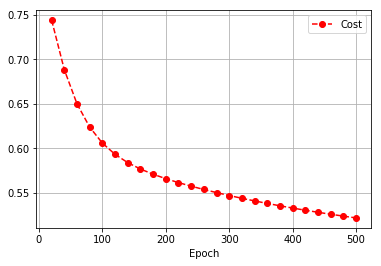

In [12]:
plt.plot(ep[1:], ls[1:], 'ro--', label='Cost')
plt.xlabel('Epoch')
plt.legend()
plt.grid()
plt.show()

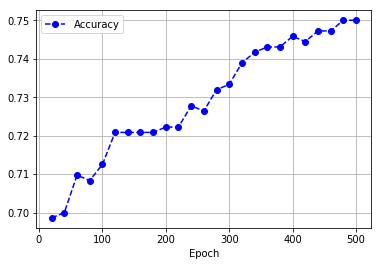

In [13]:
plt.plot(ep[1:], ac[1:], 'bo--', label='Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid()
plt.show()

In [14]:
print ("Final Test Accuracy:", acc)
sess.close()

Final Test Accuracy: 0.75
